### What is Time Series?
** A time series is a set of observations taken at specified times usually at equal intervals.                                        
** It is used to predict future values based on previous observed values.

### Components of Time Series

* Trend
* Seasonality
* Irregularity
* Cyclic

### When not to use Time Series?

* Values are constant
* Values in form of function

### What is Stationarity?

Stationarity have very strict criteria TS must have following things:
* Constant Mean
* Constant Variance
* Autocovariance doesnot depend on time

### Tests to Check Stationarity
1) Rolling Statistics:Plot moving average or moving variance and have insights whether it varies with time

2) ADCF(Augmented Dickey-fuller) Test: Null Hypothesis is that TS is nonstationary.The test results comprise of a test statistic & some critical values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,4

In [146]:
dataset=pd.read_csv("HBL Historical Data.csv",index_col=[0],parse_dates=[0])
dataset.sort_values("Daily", axis = 0, ascending = True, 
                 inplace = True) 
dataset.head()

,Closing Price
Daily,
2018-01-01,174.25
2018-01-02,179.67
2018-01-03,176.90
2018-01-04,181.70
2018-01-05,185.87


In [147]:
type(dataset)

pandas.core.frame.DataFrame

In [148]:
series_values=dataset.values

In [149]:
type(series_values)

numpy.ndarray

In [150]:
dataset.size           

716

In [151]:
dataset.describe()

,Closing Price
count,716.000000
mean,142.927975
std,29.839126
min,95.000000
25%,123.187500
50%,135.070000
75%,161.110000
max,219.000000


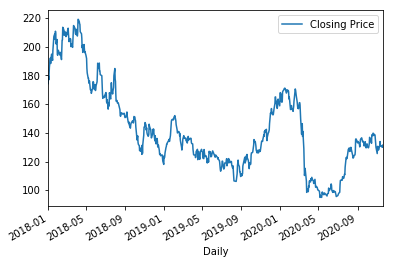

In [152]:
dataset.plot()

In [153]:
dataset_mean=dataset.rolling(window=70).mean()

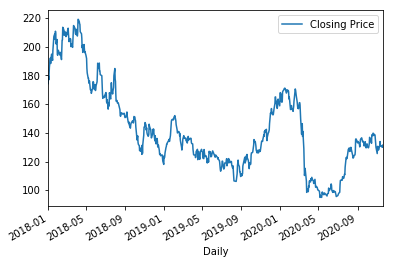

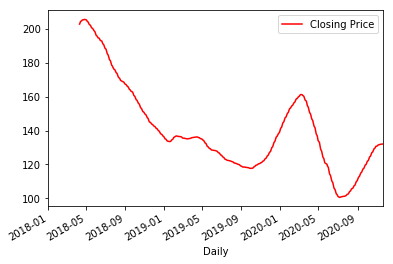

In [154]:
dataset.plot()
dataset_mean.plot(color='red')

In [155]:
#As we can see there is alot of noise from the graph of moving averages

In [156]:
dataset_df=pd.concat([dataset,dataset.shift(1)],axis=1)

In [157]:
dataset_df.head()

,Closing Price,Closing Price
Daily,,
2018-01-01,174.25,NaN
2018-01-02,179.67,174.25
2018-01-03,176.90,179.67
2018-01-04,181.70,176.90
2018-01-05,185.87,181.70


In [158]:
dataset_df.columns=['Actual_Price','Forecasted_Price']
dataset_df.head()

,Actual_Price,Forecasted_Price
Daily,,
2018-01-01,174.25,NaN
2018-01-02,179.67,174.25
2018-01-03,176.90,179.67
2018-01-04,181.70,176.90
2018-01-05,185.87,181.70


In [159]:
price_df=dataset_df[1:]

In [160]:
from sklearn.metrics import mean_squared_error
price_error=mean_squared_error(price_df.Actual_Price,price_df.Forecasted_Price)

In [161]:
price_error

8.718798741258745

In [162]:
np.sqrt(price_error) #if this is so large we need to identify outliers and must have to remove inorder to least the error value

2.952761206270962

In [163]:
#this is our baseline model which says that price of 2 everyday so it reflects whatever advance model you are going to use
#your error should go down to this error

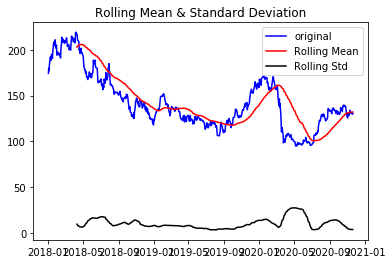

Results of dickey-fuller test
Test Statistics                 -1.658097
p-value                          0.452821
lags used                        1.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [164]:
#Determing rolling statistics
rolmean=dataset.rolling(window=70).mean()
rolstd=dataset.rolling(window=70).std()
#print(rolmean,rolstd)

#plot rolling statistics
orig=plt.plot(dataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of dickey-fuller test')
dftest=adfuller(dataset['Closing Price'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
                 

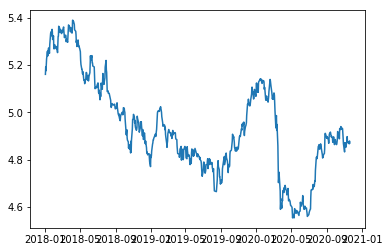

In [165]:
#Estimating Trend
dataset_logScale=np.log(dataset)
plt.plot(dataset_logScale)

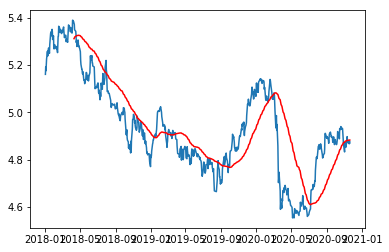

In [166]:
movingAverage=dataset_logScale.rolling(window=70).mean()
movingSTD=dataset_logScale.rolling(window=70).std()
plt.plot(dataset_logScale)
plt.plot(movingAverage,color='red')

In [167]:
datasetlogScaleMinusmovingAverage=dataset_logScale-movingAverage
datasetlogScaleMinusmovingAverage.head(20)

#Removing Nan Values
datasetlogScaleMinusmovingAverage.dropna(inplace=True)
datasetlogScaleMinusmovingAverage.head(20)

,Closing Price
Daily,
2018-04-10,0.064110
2018-04-11,0.058710
2018-04-12,0.032973
2018-04-13,0.028144
2018-04-16,0.021371
2018-04-17,0.005444
2018-04-18,-0.028197
2018-04-19,-0.020586
2018-04-20,-0.046114


In [168]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    movingAverage=timeseries.rolling(window=70).mean()
    movingSTD=timeseries.rolling(window=70).std()
    
    #PLOT Rolling Statistics
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of dickey-fuller test')
    dftest=adfuller(timeseries['Closing Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    

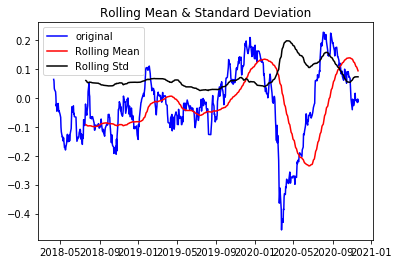

Results of dickey-fuller test
Test Statistics                 -2.374549
p-value                          0.149049
lags used                        1.000000
number of observations used    645.000000
Critical Value (1%)             -3.440529
Critical Value (5%)             -2.866031
Critical Value (10%)            -2.569162
dtype: float64


In [169]:
test_stationarity(datasetlogScaleMinusmovingAverage)

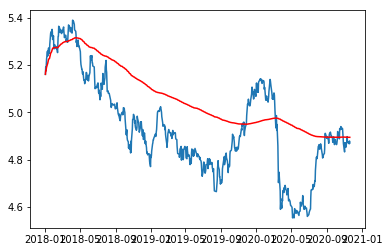

In [170]:
exponentialDecayWeightedAverage=dataset_logScale.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(dataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

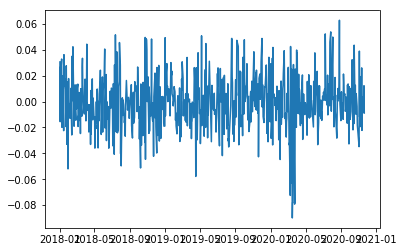

In [171]:
datasetLogDiffShifting=dataset_logScale-dataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

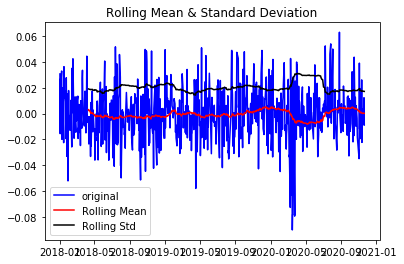

Results of dickey-fuller test
Test Statistics                -24.721164
p-value                          0.000000
lags used                        0.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [172]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

#### ARIMA(AUTOREGRESSIVE MOVING AVERAGE MODEL)

In [173]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

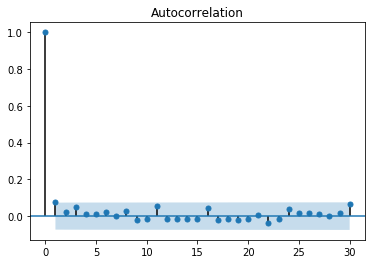

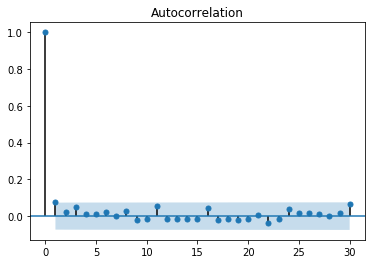

In [174]:
#plot_acf is to identify parameter Q
#plot_pacf is to identify parameter P
plot_acf(datasetLogDiffShifting,lags=30)

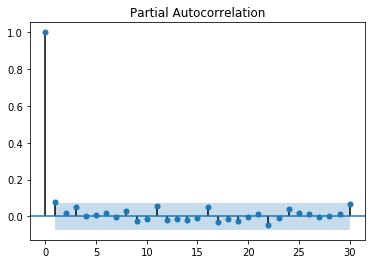

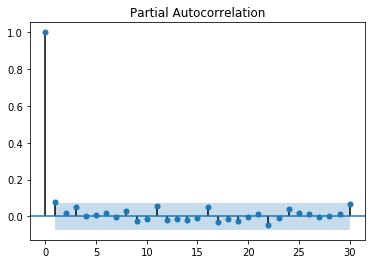

In [175]:
plot_pacf(datasetLogDiffShifting,lags=30)

In [176]:
#p=1,3 d=0,1,2 #q=1,3

In [177]:
datasetLogDiffShifting.size

715

In [204]:
return_train=datasetLogDiffShifting[0:572]
return_test=datasetLogDiffShifting[572:716]

In [205]:
return_train.size

572

In [206]:
return_test.size

143

In [207]:
from statsmodels.tsa.arima_model import ARIMA
dataset_model=ARIMA(return_train,order=(1,0,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [208]:
dataset_model_fit=dataset_model.fit()

In [209]:
dataset_model_fit.aic

-2775.168294892399

In [210]:
return_forecasted=dataset_model_fit.forecast(steps=143)[0]

In [211]:
return_forecasted

array([-0.00086403, -0.00096616, -0.00090836, -0.00094107, -0.00092256,
       -0.00093304, -0.00092711, -0.00093046, -0.00092856, -0.00092964,
       -0.00092903, -0.00092937, -0.00092918, -0.00092929, -0.00092923,
       -0.00092926, -0.00092924, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00092925,
       -0.00092925, -0.00092925, -0.00092925, -0.00092925, -0.00

In [212]:
return_test.head()

,Closing Price
Daily,
2020-04-24,0.005857
2020-04-27,-0.007326
2020-04-28,-0.010050
2020-04-29,-0.007754
2020-04-30,-0.000899


In [213]:
np.sqrt(mean_squared_error(return_test,return_forecasted))

0.017161876898333584

In [127]:
#since this ARIMA model gives less error as compared to the simple baseline model this is good to evaluate results

In [ ]:
#2) ARIMA on Log SCaleDataset

In [258]:
return_train=dataset_logScale[0:572]
return_test=dataset_logScale[572:716]

In [259]:
return_train.size

572

In [260]:
return_test.size

144

In [261]:
from statsmodels.tsa.arima_model import ARIMA
dataset_model=ARIMA(return_train,order=(1,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [262]:
dataset_model_fit=dataset_model.fit()

In [263]:
dataset_model_fit.aic

-2769.307609316442

In [264]:
return_forecasted=dataset_model_fit.forecast(steps=144)[0]

In [265]:
np.sqrt(mean_squared_error(return_test,return_forecasted))

0.26725746457017296

In [ ]:
#3) ARIMA ON Original Dataset

In [266]:
return_train=dataset[0:572]
return_test=dataset[572:716]

In [267]:
return_train.size

572

In [268]:
return_test.size

144

In [279]:
from statsmodels.tsa.arima_model import ARIMA
dataset_model=ARIMA(return_train,order=(1,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [280]:
dataset_model_fit=dataset_model.fit()

In [281]:
dataset_model_fit.aic

2930.3496590594714

In [282]:
return_forecasted=dataset_model_fit.forecast(steps=144)[0]

In [283]:
np.sqrt(mean_squared_error(return_test,return_forecasted))

32.8925593074665